In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

pd.set_option('display.max_rows', 1000)

In [3]:
# 파일 경로 패턴 설정
file_paths = glob.glob('/Users/kimgayeong/Desktop/파이널/open/train/1.회원정보/*.parquet')

# 파일들을 읽어서 리스트에 담고 모두 concat
df_list = [pd.read_parquet(path) for path in file_paths]
train_df = pd.concat(df_list, ignore_index=True)

# 확인
print(train_df.shape)
train_df.head()

(2400000, 78)


,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201811,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),26
1,201811,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),22
2,201811,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,24
3,201811,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),21
4,201811,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),19


In [4]:
# 데이터 프레임 정보 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 78 columns):
 #   Column              Dtype  
---  ------              -----  
 0   기준년월                int64  
 1   ID                  object 
 2   남녀구분코드              int64  
 3   연령                  object 
 4   Segment             object 
 5   회원여부_이용가능           int64  
 6   회원여부_이용가능_CA        int64  
 7   회원여부_이용가능_카드론       int64  
 8   소지여부_신용             int64  
 9   소지카드수_유효_신용         int64  
 10  소지카드수_이용가능_신용       int64  
 11  입회일자_신용             int64  
 12  입회경과개월수_신용          int64  
 13  회원여부_연체             int64  
 14  이용거절여부_카드론          int64  
 15  동의여부_한도증액안내         int64  
 16  수신거부여부_TM           int64  
 17  수신거부여부_DM           int64  
 18  수신거부여부_메일           int64  
 19  수신거부여부_SMS          int64  
 20  가입통신회사코드            object 
 21  탈회횟수_누적             int64  
 22  최종탈회후경과월            int64  
 23  탈회횟수_발급6개월이내        int64  
 24  탈회횟수_발급1년이내         int6

In [5]:
# 결측치 확인
train_df.isna().sum()

기준년월                       0
ID                         0
남녀구분코드                     0
연령                         0
Segment                    0
회원여부_이용가능                  0
회원여부_이용가능_CA               0
회원여부_이용가능_카드론              0
소지여부_신용                    0
소지카드수_유효_신용                0
소지카드수_이용가능_신용              0
입회일자_신용                    0
입회경과개월수_신용                 0
회원여부_연체                    0
이용거절여부_카드론                 0
동의여부_한도증액안내                0
수신거부여부_TM                  0
수신거부여부_DM                  0
수신거부여부_메일                  0
수신거부여부_SMS                 0
가입통신회사코드              387570
탈회횟수_누적                    0
최종탈회후경과월                   0
탈회횟수_발급6개월이내               0
탈회횟수_발급1년이내                0
거주시도명                      0
직장시도명                 244969
마케팅동의여부                    0
유효카드수_신용체크                 0
유효카드수_신용                   0
유효카드수_신용_가족                0
유효카드수_체크                   0
유효카드수_체크_가족                0
이용가능카드수_신용체크               0
이용가능카드수_신용    

In [6]:
na_counts = train_df.isna().sum()
na_counts = na_counts[na_counts > 0]
print(na_counts.to_frame(name='결측치 개수'))

                결측치 개수
가입통신회사코드        387570
직장시도명           244969
_1순위신용체크구분       27950
_2순위신용체크구분      958115
최종유효년월_신용_이용가능  210447
최종유효년월_신용_이용    534231
최종카드발급일자         41965


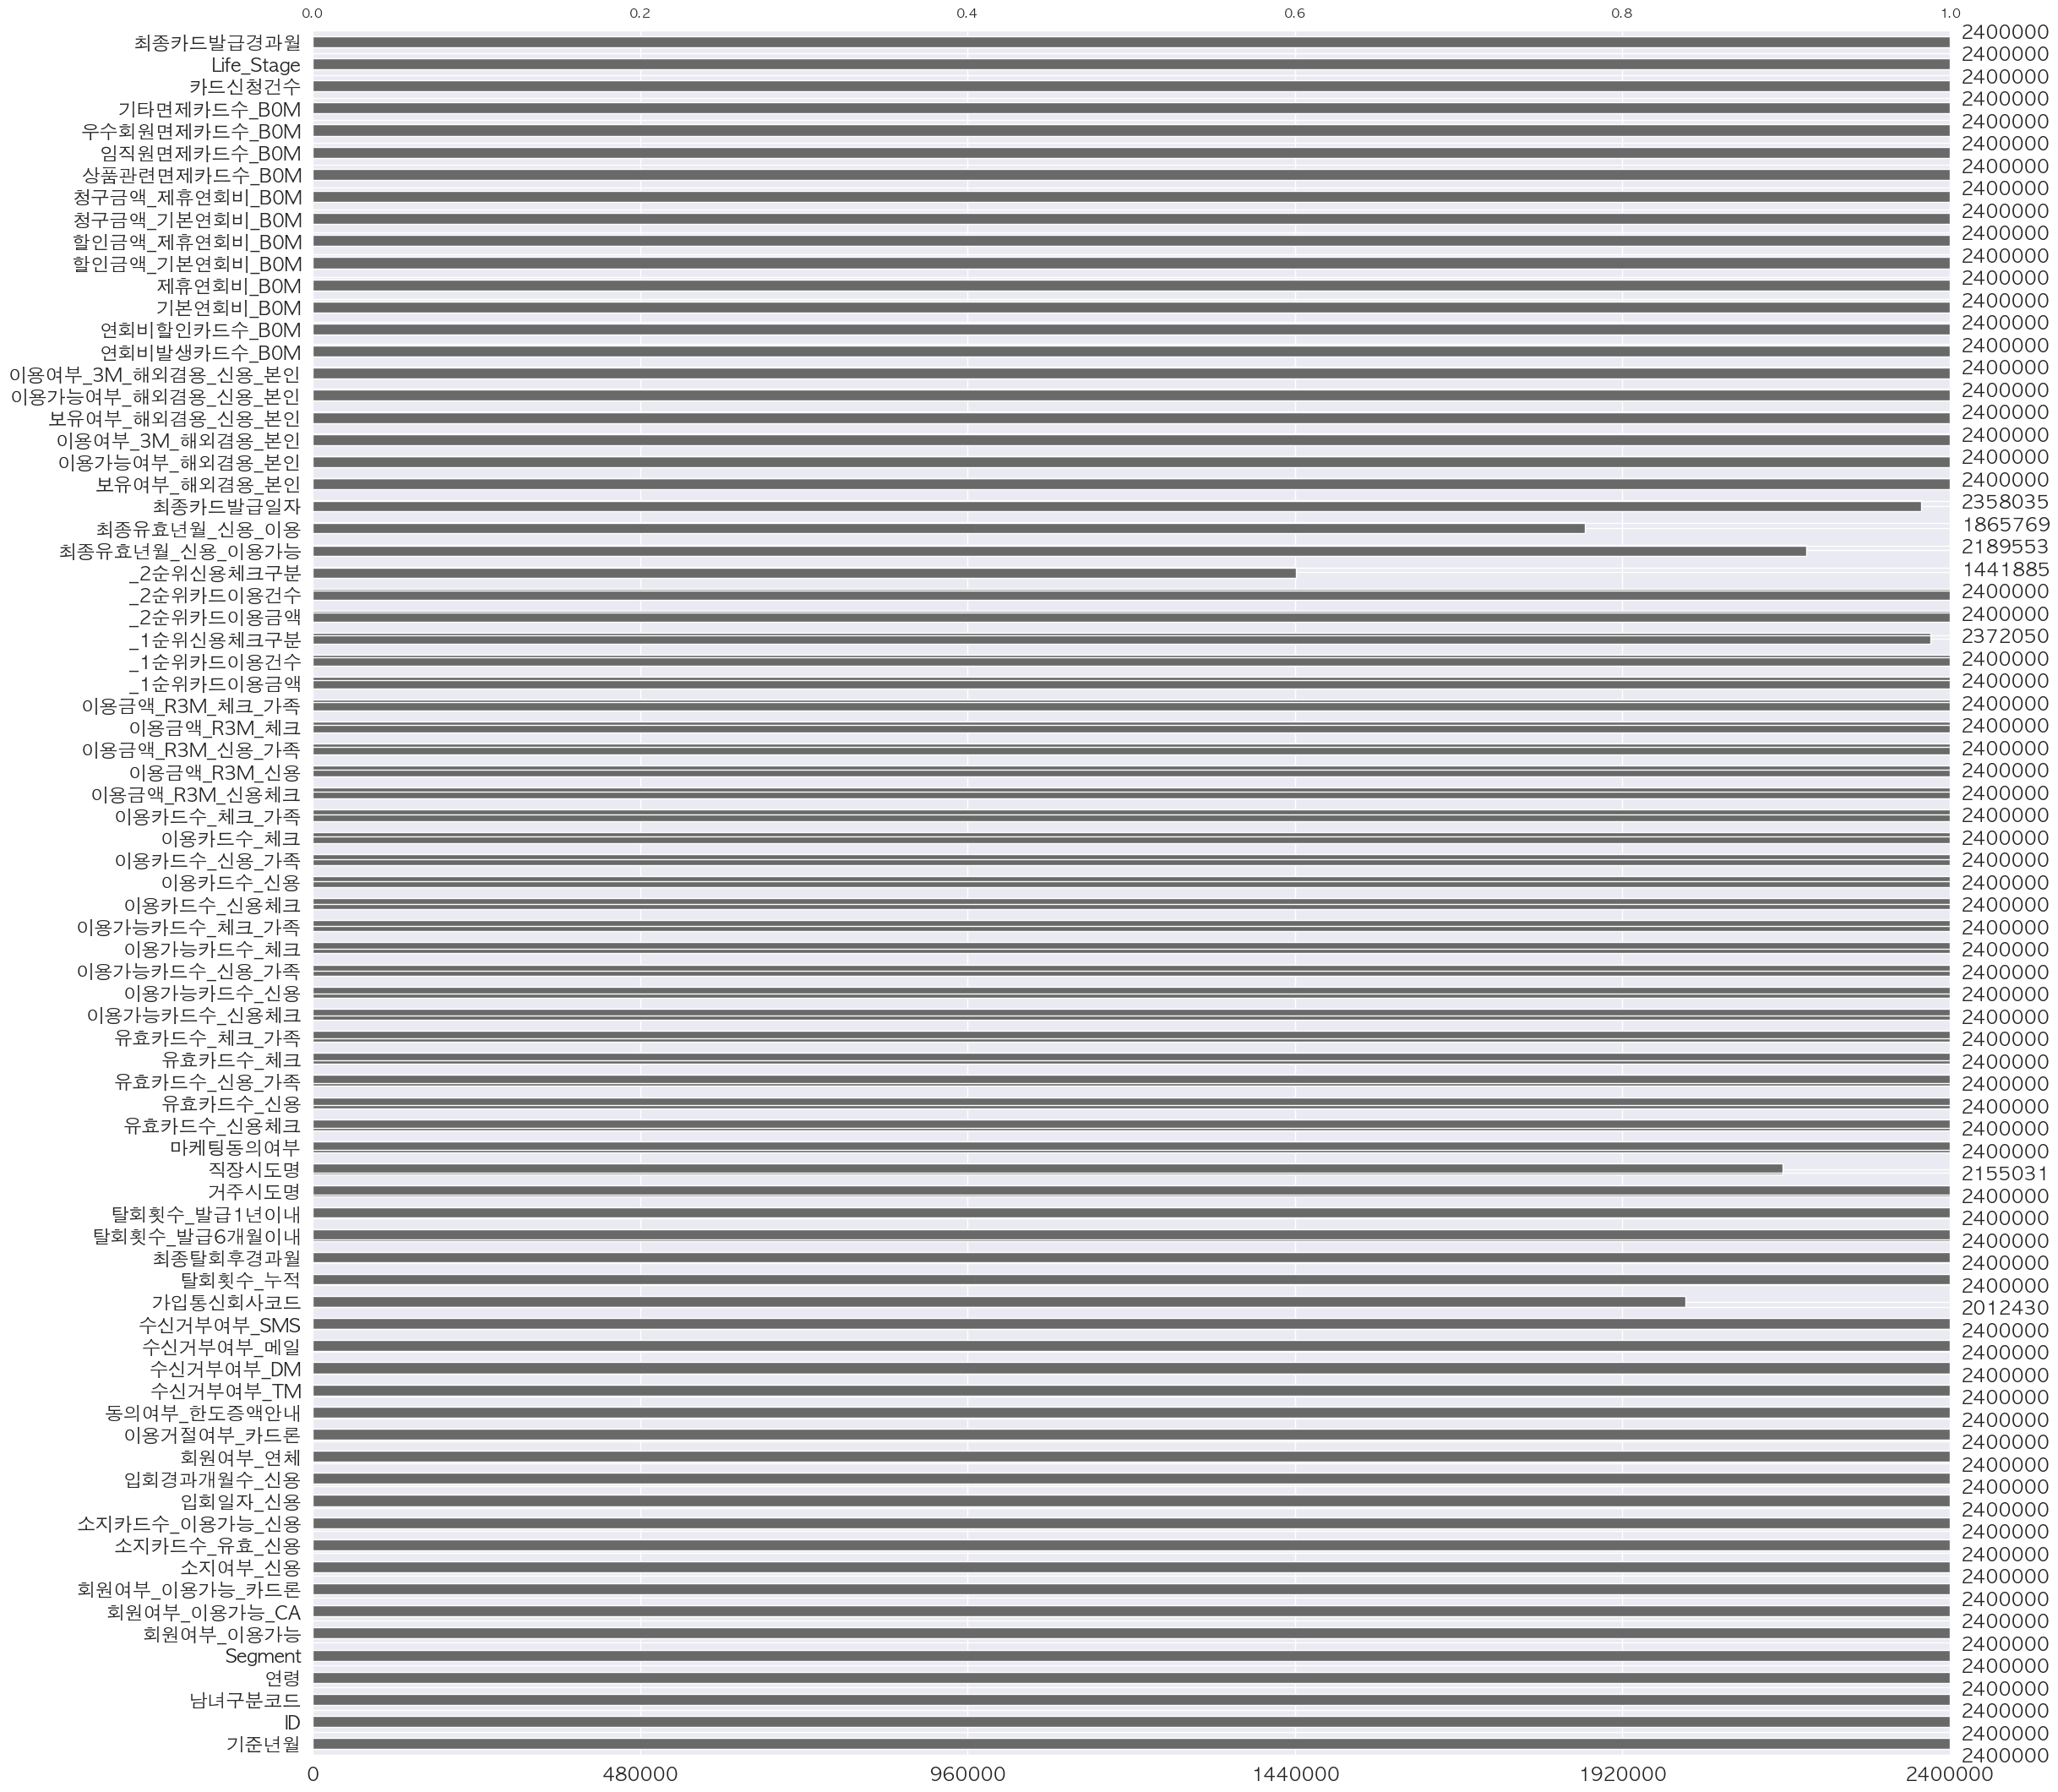

In [7]:
# 각 컬럼별 결측치 현황을 막대 그래프 형태로 확인해본다.
# 결측치를 제외한 데이터 개수
missingno.bar(train_df)
plt.show()

<Axes: >

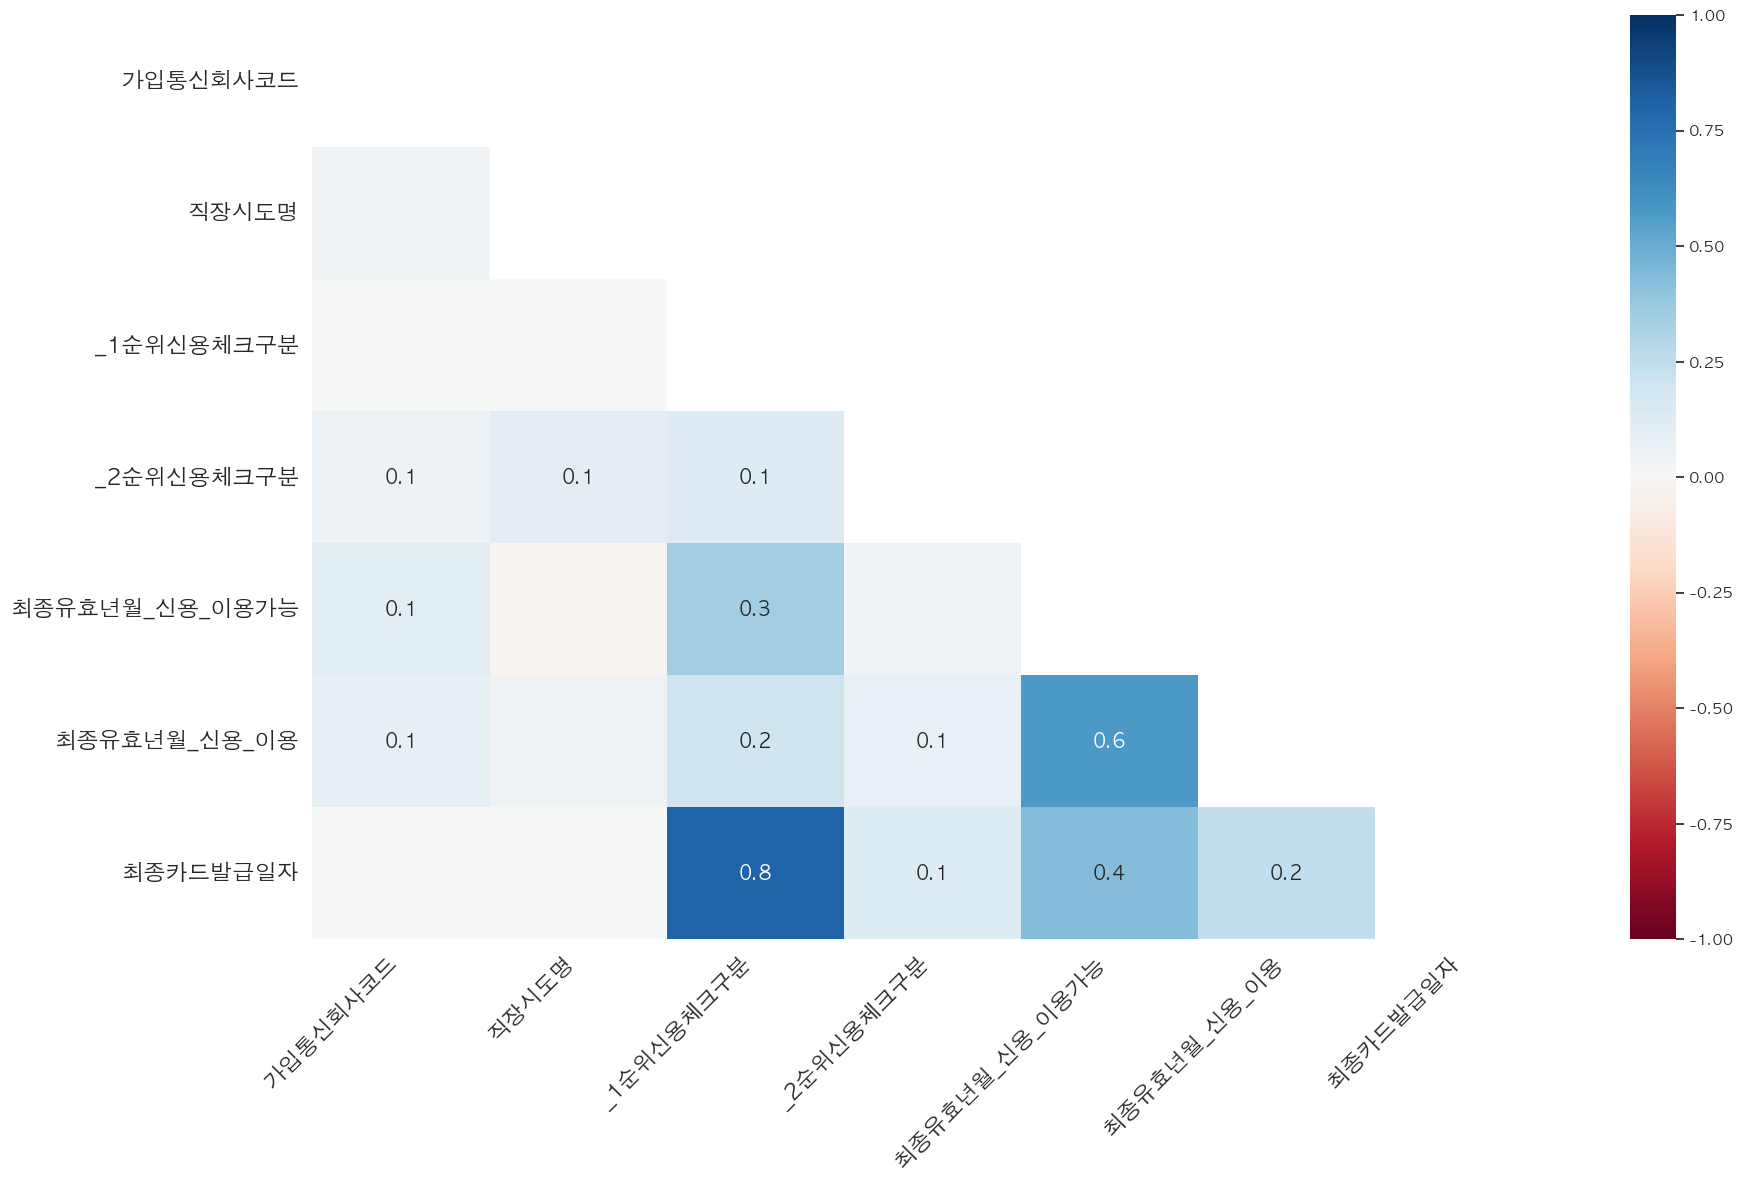

In [8]:
# 양의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서도 값이 누락될 가능성이 높은 것
# 음의 상관 관계 : 하나의 변수에서 값이 누락될 때 다른 변수에서는 값이 누락될 가능성이 낮은 것
# 0에 가까울 : 두 변수 값의 결측치값 유무가 서로 독립적이다.
missingno.heatmap(train_df)

<Axes: >

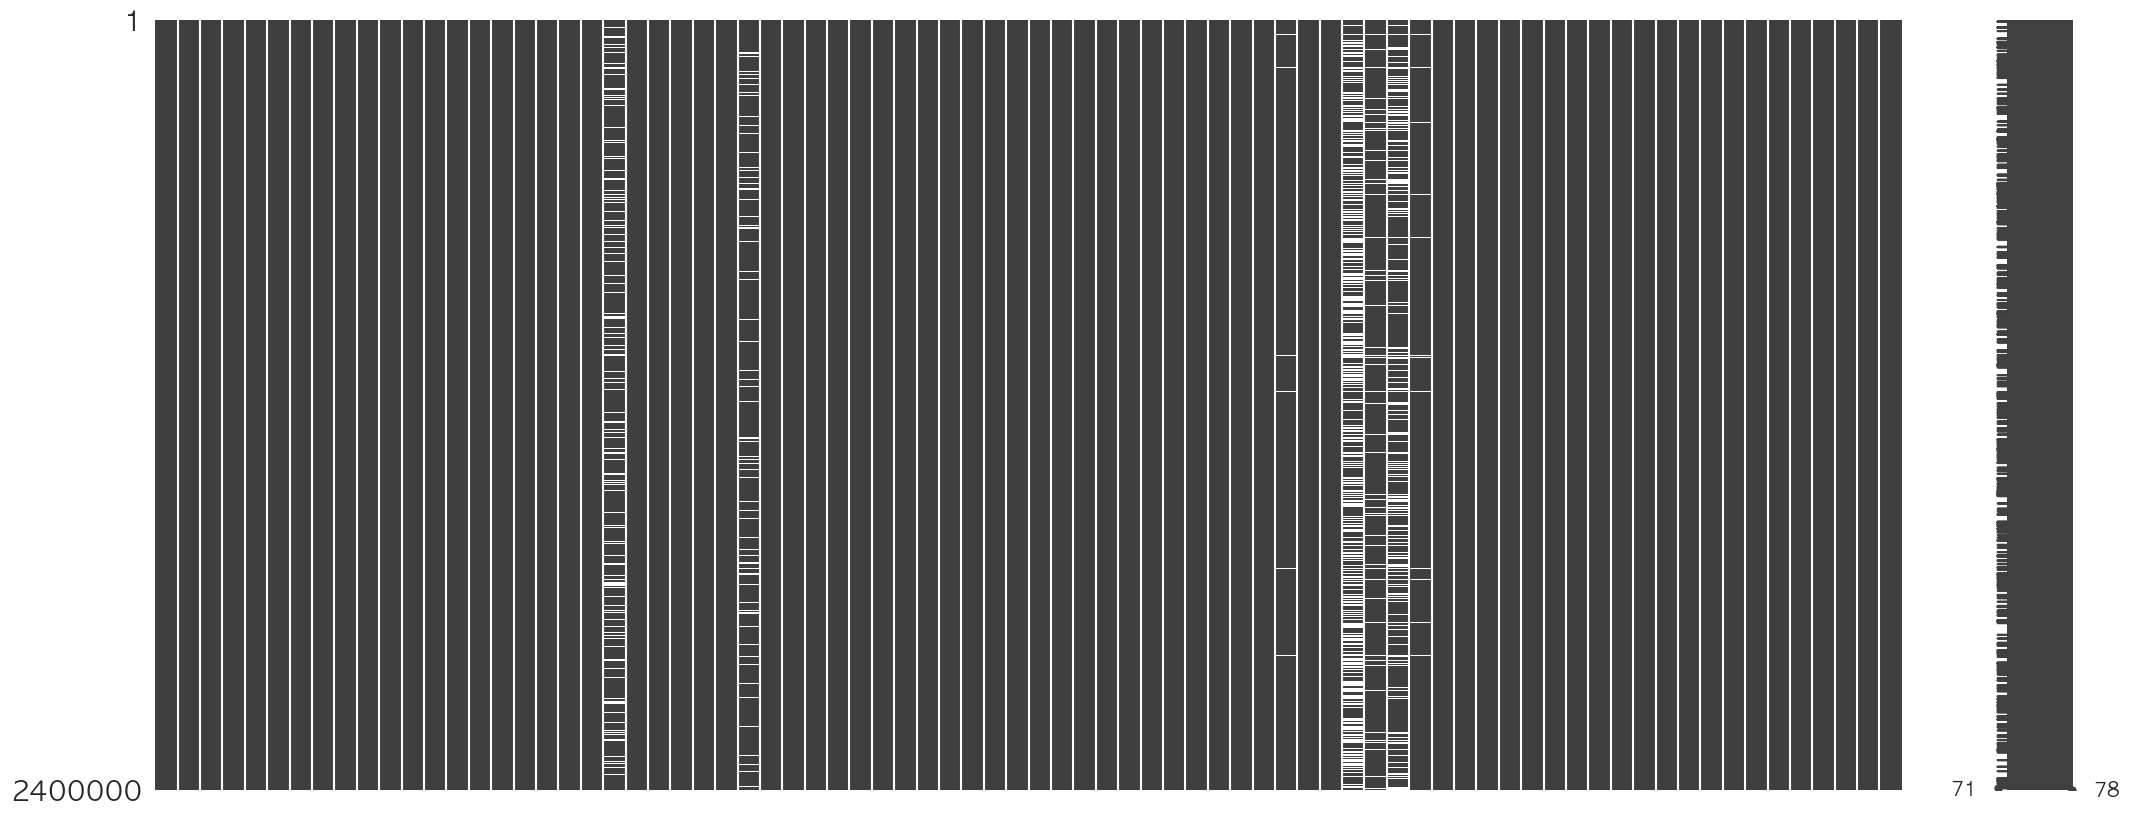

In [9]:
# 각 행별로 결측치가 어느 행에 있는지를 시각화한다.
missingno.matrix(train_df)

In [10]:
train_df['Segment'].value_counts()

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

In [11]:
# 결측치가 없는 컬럼들만 선택
train_df_no_na = train_df.dropna(axis=1)

# 결과 확인
print(f"원본 컬럼 수: {train_df.shape[1]}")
print(f"결측치 없는 컬럼 수: {train_df_no_na.shape[1]}")

원본 컬럼 수: 78
결측치 없는 컬럼 수: 71


In [12]:
# 결측치가 있는 컬럼 제거
train_df_no_na = train_df.dropna(axis=1)
train_df_no_na.shape[1]

71

In [13]:
# CSV 파일로 저장
train_df_no_na.to_csv('train_회원정보.csv', index=False, encoding='utf-8')
print("저장 완료")

저장 완료


In [31]:
df = pd.read_csv('/Users/kimgayeong/Desktop/파이널/작업/train_회원정보.csv')

# 데이터프레임의 요약 통계 정보
pd.concat([df.iloc[:, :3], df.iloc[:, -3:]], axis=1)

,기준년월,ID,남녀구분코드,카드신청건수,Life_Stage,최종카드발급경과월
0,201811,TRAIN_000000,2,0,자녀성장(2),26
1,201811,TRAIN_000001,1,0,자녀성장(1),22
2,201811,TRAIN_000002,1,0,자녀출산기,24
3,201811,TRAIN_000003,2,1,자녀성장(2),21
4,201811,TRAIN_000004,2,0,자녀성장(1),19
...,...,...,...,...,...,...
2399995,201809,TRAIN_399995,2,0,노년생활,36
2399996,201809,TRAIN_399996,2,0,자녀성장(2),21
2399997,201809,TRAIN_399997,1,0,자녀출산기,15
2399998,201809,TRAIN_399998,1,0,자녀성장(1),24
